In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
import random
import pandas as pd
import numpy as np

# Randomly generated tweets
tweets = [
    "Absolutely love this service! #amazing #bestexperience",
    "Horrible experience with the delivery! #worst #neveragain",
    "The product quality is average. #neutral #meh",
    "I'm thrilled with the new update! #excited #loveit",
    "The customer support was rude and unhelpful. #badservice",
    "Quick delivery and excellent packaging! #happy #satisfied",
    "Why are they always late? Disappointed. #latenight #badservice",
    "This is a game-changer! Highly recommend. #awesome #future",
    "Neutral about the new policy. No big deal. #okay",
    "I can't believe how bad this is! #shocked #angry",
    "Thanks for the amazing support! #grateful #happycustomer",
    "This service keeps getting worse. #disappointed",
    "Loving the new interface. So user-friendly! #amazingUI #love",
    "Could use some improvement, but not bad. #decent",
    "Extremely disappointed with the response time. #slow",
    "Wonderful experience overall. Keep it up! #kudos",
    "Not worth the hype at all. #overrated",
    "Best decision I ever made! #happycustomer #winning",
    "The service is improving steadily. #progress",
    "What a complete waste of time. #worstday",
]

# Randomly generate engagement metrics and dates
np.random.seed(42)
likes = np.random.randint(0, 500, size=50)
retweets = np.random.randint(0, 50, size=50)
sentiments = random.choices(['positive', 'neutral', 'negative'], weights=[0.5, 0.3, 0.2], k=50)
dates = pd.date_range(start='2023-12-01', periods=50).to_list()
hashtags = [
    ["#amazing", "#happy"], ["#worst"], ["#neutral"], ["#excited"], ["#badservice"], ["#satisfied"], ["#latenight"],
    ["#awesome"], ["#okay"], ["#angry"], ["#grateful"], ["#disappointed"], ["#love"], ["#decent"], ["#slow"], ["#kudos"],
    ["#overrated"], ["#winning"], ["#progress"], ["#worstday"]
]
tweets += random.choices(tweets, k=30)

# Dataframe
df_extended = pd.DataFrame({
    'tweet': tweets,
    'sentiment': sentiments,
    'likes': likes,
    'retweets': retweets,
    'date': random.choices(dates, k=50),
    'hashtags': random.choices(hashtags, k=50),
})

# Preview
print(df_extended.head())


                                               tweet sentiment  likes  \
0  Absolutely love this service! #amazing #bestex...   neutral    102   
1  Horrible experience with the delivery! #worst ...  positive    435   
2      The product quality is average. #neutral #meh  positive    348   
3  I'm thrilled with the new update! #excited #lo...  negative    270   
4  The customer support was rude and unhelpful. #...  positive    106   

   retweets       date     hashtags  
0        43 2024-01-14   [#neutral]  
1         2 2023-12-01  [#grateful]  
2        36 2023-12-13   [#neutral]  
3         6 2023-12-27     [#worst]  
4        20 2023-12-28   [#awesome]  


<ipython-input-3-95b93ebb932e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


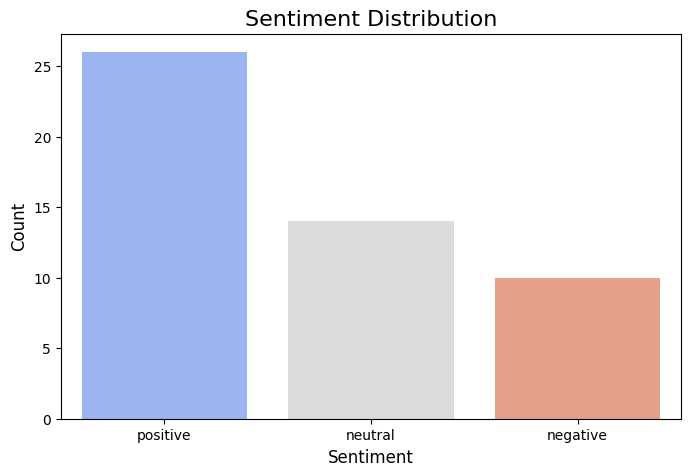

In [ ]:
# Count sentiments
sentiment_counts = df_extended['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Top 10 Hashtags: [('#love', 5), ('#neutral', 4), ('#awesome', 4), ('#disappointed', 4), ('#slow', 4), ('#worst', 3), ('#latenight', 3), ('#worstday', 3), ('#okay', 3), ('#angry', 3)]


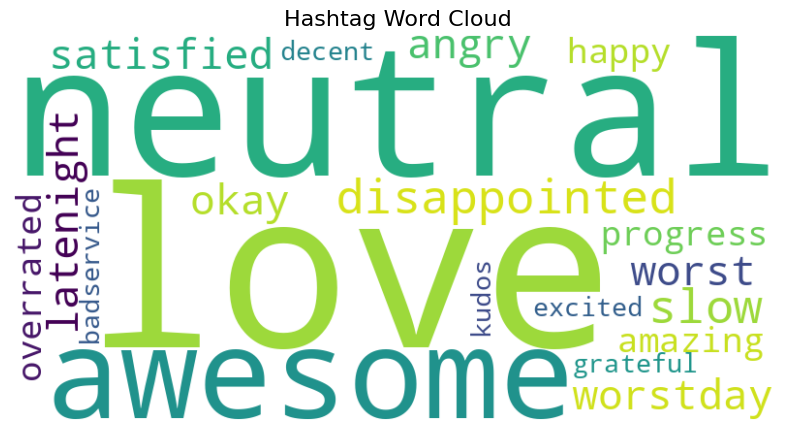

In [ ]:
from collections import Counter
import re
from wordcloud import WordCloud

# Flatten hashtag list
all_hashtags = sum(df_extended['hashtags'], [])

# Count frequency of hashtags
hashtag_counts = Counter(all_hashtags)

# Top hashtags
top_hashtags = hashtag_counts.most_common(10)
print("Top 10 Hashtags:", top_hashtags)

# Generate a word cloud for hashtags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_hashtags))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=16)
plt.show()


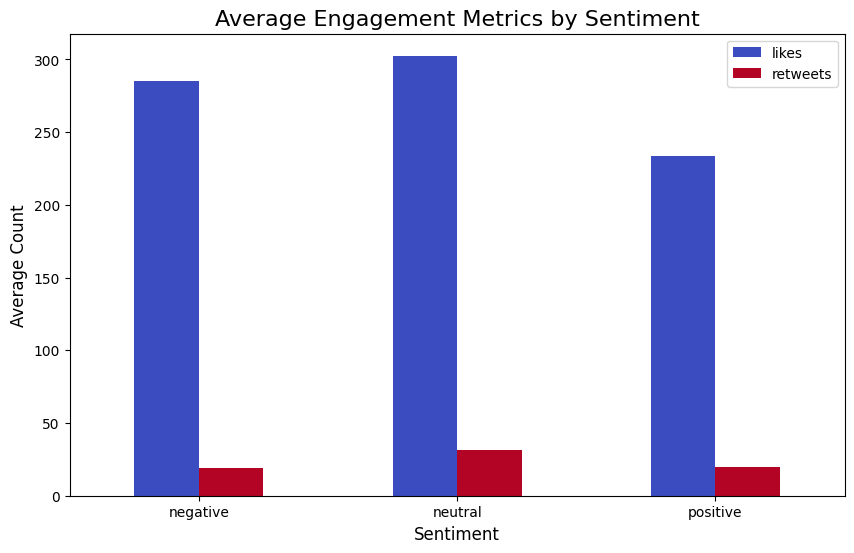

In [ ]:
# Group by sentiment
engagement_metrics = df_extended.groupby('sentiment')[['likes', 'retweets']].mean()

# Plot engagement metrics
engagement_metrics.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Average Engagement Metrics by Sentiment', fontsize=16)
plt.ylabel('Average Count', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Group by date and sentiment
sentiment_time = df_extended.groupby(['date', 'sentiment']).size().reset_index(name='count')

# Plot sentiment trends
fig = px.line(
    sentiment_time,
    x='date',
    y='count',
    color='sentiment',
    markers=True,
    title='Sentiment Trends Over Time'
)
fig.update_layout(
    title_font_size=18,
    xaxis_title='Date',
    yaxis_title='Sentiment Count',
    legend_title='Sentiment'
)
fig.show()
